In [1]:
!pip install fastai

In [0]:
%matplotlib inline

from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
path=untar_data("https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet");path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno=path/'annotations'
path_img=path/'images'

In [7]:
fnames=get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_82.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_115.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bombay_201.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_188.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_145.jpg')]

In [8]:
annotations=get_files(path_anno)
annotations[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/list.txt'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/trainval.txt'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/test.txt'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/README')]

In [0]:
pat=r'/([^/]+)_\d+.jpg$'


In [10]:
data=ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yorkshire_terrier,Bombay,boxer,boxer,leonberger
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_bulldog,keeshond,german_shorthaired,Persian,Ragdoll
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

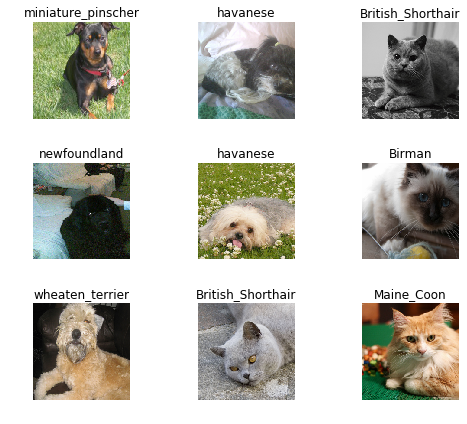

In [11]:
data.show_batch(rows=3,figsize=(7,6))

In [12]:
print(data.classes)
len(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

In [13]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 159198311.65it/s]


In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.407960,0.318874,0.087280,01:27
1,0.551177,0.265813,0.086604,01:25
2,0.347763,0.210552,0.061570,01:25
3,0.255088,0.201824,0.064953,01:27


In [0]:
learn.save('Stage1')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

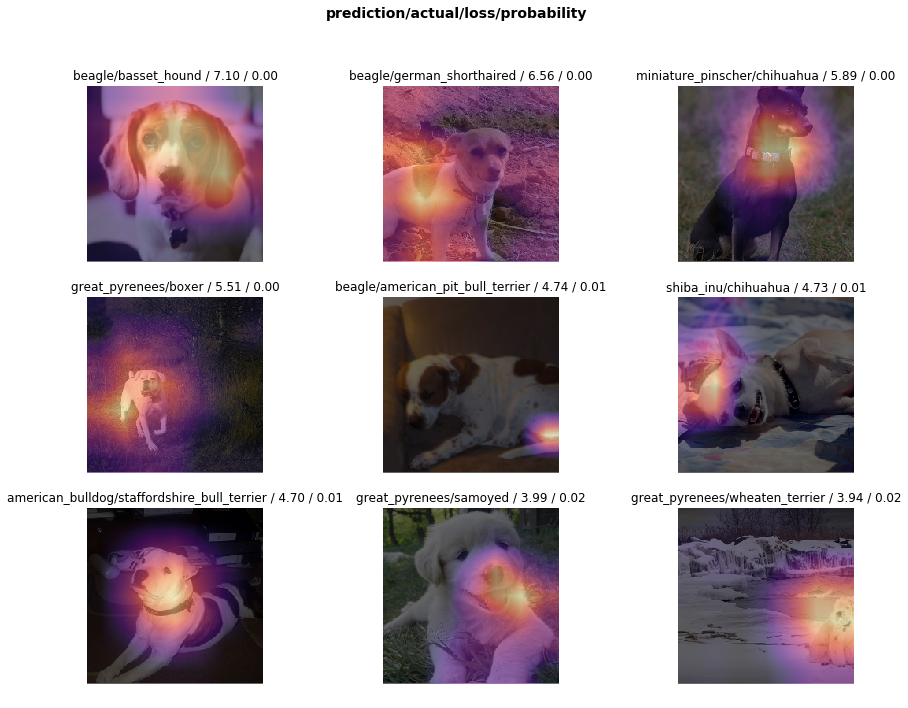

In [19]:
interp.plot_top_losses(9,figsize=(15,11))

In [20]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_bulldog', 6),
 ('beagle', 'basset_hound', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Ragdoll', 'Birman', 3),
 ('american_bulldog', 'boxer', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Egyptian_Mau', 'Russian_Blue', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('basset_hound', 'english_cocker_spaniel', 2),
 ('havanese', 'scottish_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('newfoundland', 'german_shorthaired', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

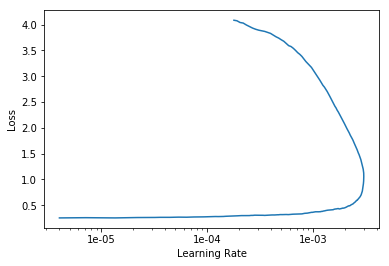

In [21]:
learn.recorder.plot()

In [23]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-04))


epoch,train_loss,valid_loss,error_rate,time
0,0.199971,0.191509,0.061570,01:29
1,0.187034,0.189878,0.063599,01:28
